# Importing Libraries and data

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Performing EDA

In [3]:
df.shape

(301, 9)

exploring the no. of classes in each categorical column

In [4]:
cat_cols=['Fuel_Type','Seller_Type','Transmission','Owner']
for i in cat_cols:
    print(i,':',df[i].unique())

Fuel_Type : ['Petrol' 'Diesel' 'CNG']
Seller_Type : ['Dealer' 'Individual']
Transmission : ['Manual' 'Automatic']
Owner : [0 1 3]


Checking null values

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
final_df=df.drop('Car_Name',axis=1)

Creating a new column about how many years the car has been used by subtracting the start year from current year

In [8]:
final_df['used_years']=date.today().year-final_df['Year']

In [9]:
final_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,used_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
final_df.drop('Year',axis=1,inplace=True)

In [11]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,used_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


Performing OneHotEncoding

In [12]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [13]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


Generating the correlationg between the columns and visualizing it using seaborn library

In [14]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,used_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
used_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

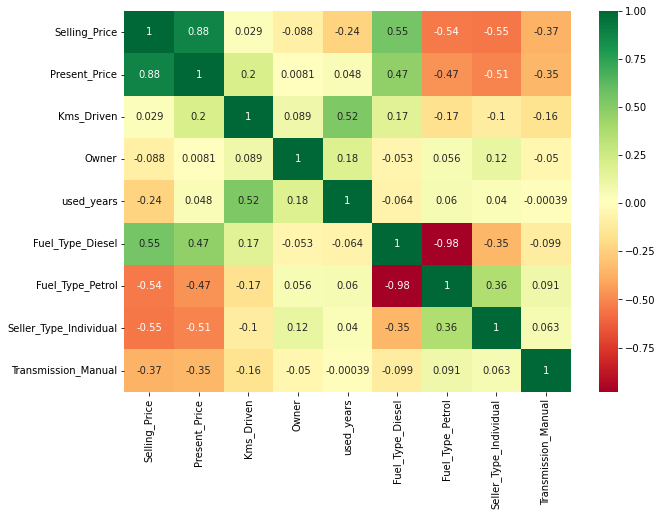

In [16]:
plt.figure(figsize=(10,7))
sb.heatmap(final_df.corr(),annot=True,cmap="RdYlGn")
plt.show()

Exploring which are the columns that affect the target variable the most in a sequence and visualizing it

In [17]:
x=final_df.drop('Selling_Price',axis=True)
y=final_df['Selling_Price']

In [18]:
from sklearn.ensemble import ExtraTreesRegressor

In [19]:
model=ExtraTreesRegressor()
model.fit(x,y)
model.feature_importances_

array([0.37149699, 0.04346297, 0.00040539, 0.07478352, 0.24024323,
       0.00942923, 0.11412352, 0.14605516])

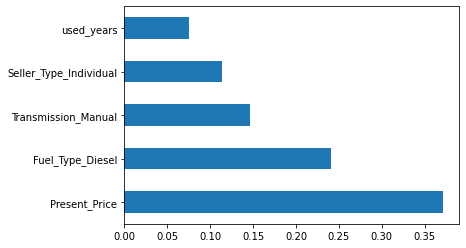

In [20]:
important_features=pd.Series(model.feature_importances_,x.columns)
important_features.nlargest(5).plot(kind='barh')
plt.show()

# Model Building

Splitting the data into train and test 

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=5)

In [23]:
xtrain.shape

(240, 8)

importing RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_fr=RandomForestRegressor()

In [25]:
import numpy as np

hyperparameters tuning

In [26]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [27]:
rf_grid={'n_estimators':n_estimators,
        'max_depth':max_depth,
        'max_features':max_features,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf}
print(rf_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
rf_random=RandomizedSearchCV(estimator=random_fr,param_distributions=rf_grid,scoring='neg_mean_squared_error',verbose=2,n_iter=10,cv=5,random_state=42,n_jobs=1)

fitting the model

In [30]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [31]:
predictions=rf_random.predict(xtest)

In [32]:
predictions

array([ 8.96208945,  9.01301874,  4.37970699,  5.01393564,  2.71965971,
        8.83110622,  8.26011998,  0.68317861, 21.4205097 ,  4.98273199,
        5.57634612,  7.47603186,  3.94028967,  4.87913273,  0.44879135,
        2.97677658,  6.62578174,  0.48110971,  6.69903541,  0.42730122,
        4.78735653, 21.61524656, 21.55755066,  1.02605087,  2.74908606,
        4.66802495,  5.27273131,  7.96031118,  5.70796098,  4.63401397,
        4.79508805, 10.38046074,  4.83275629,  0.29530915,  0.34271197,
        5.27472288,  7.79158924,  5.2270087 ,  1.27936   ,  2.505793  ,
        0.72175611,  5.25285668, 14.16866837,  0.2047834 ,  1.14229936,
        4.6352229 ,  0.29219864,  7.94900897,  3.02962829,  5.03519626,
        4.34303293, 19.81924521,  2.90975323,  1.24787789,  0.35606165,
        0.25465712,  2.84664999,  0.34874591,  0.3838978 ,  0.70420849,
        0.55022831])

Plotting the distribution of our data 

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

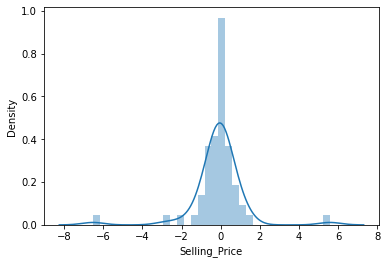

In [33]:
sb.distplot(ytest-predictions)

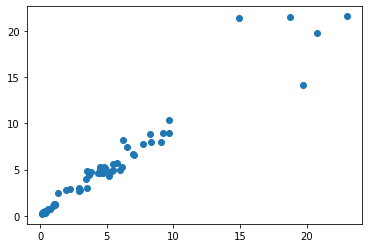

In [34]:
plt.scatter(ytest,predictions)

In [39]:
rf_random.predict([[3.35,27000,0,8,0,1,0,1]])

array([2.76661068])